## Assignment 2
# Linear regression
Linear regression is one of the most fundamental and widely used supervised learning algorithms in machine learning and statistics. It models the relationship between a dependent variable (target) and one or more independent variables (features) using a linear equatio

In [983]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

plt.style.use(plt.style.available[16])

### Data Loading

In [984]:
dir_path = "./regression-dataset/"
assert (
    os.path.exists(dir_path)
), "could not locate the required data files. Please ensure the dir_path variable is set to the correct directory where the input files are stored."

In [985]:
X_train = pd.read_csv(os.path.join(dir_path,"train_inputs.csv"), header=None)
y_train = pd.read_csv(os.path.join(dir_path, "train_targets.csv"), header=None)
X_test = pd.read_csv(os.path.join(dir_path, "test_inputs.csv"), header=None)
y_test = pd.read_csv(os.path.join(dir_path, "test_targets.csv"), header=None)

In [986]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}\n")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (200, 2)
y_train Shape: (200, 1)

X_test Shape: (100, 2)
y_test Shape: (100, 1)


In [987]:
X_train.head()

,0,1
0,0.266095,0.516330
1,0.211287,0.436032
2,0.509464,0.166131
3,0.755865,0.708364
4,0.136161,0.712133


In [988]:
y_train.head()

,0
0,-0.637080
1,-1.370977
2,-0.145243
3,0.458230
4,1.190616


In [989]:
# Flatten Data
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().flatten()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy().flatten()

In [990]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}\n")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (200, 2)
y_train Shape: (200,)

X_test Shape: (100, 2)
y_test Shape: (100,)


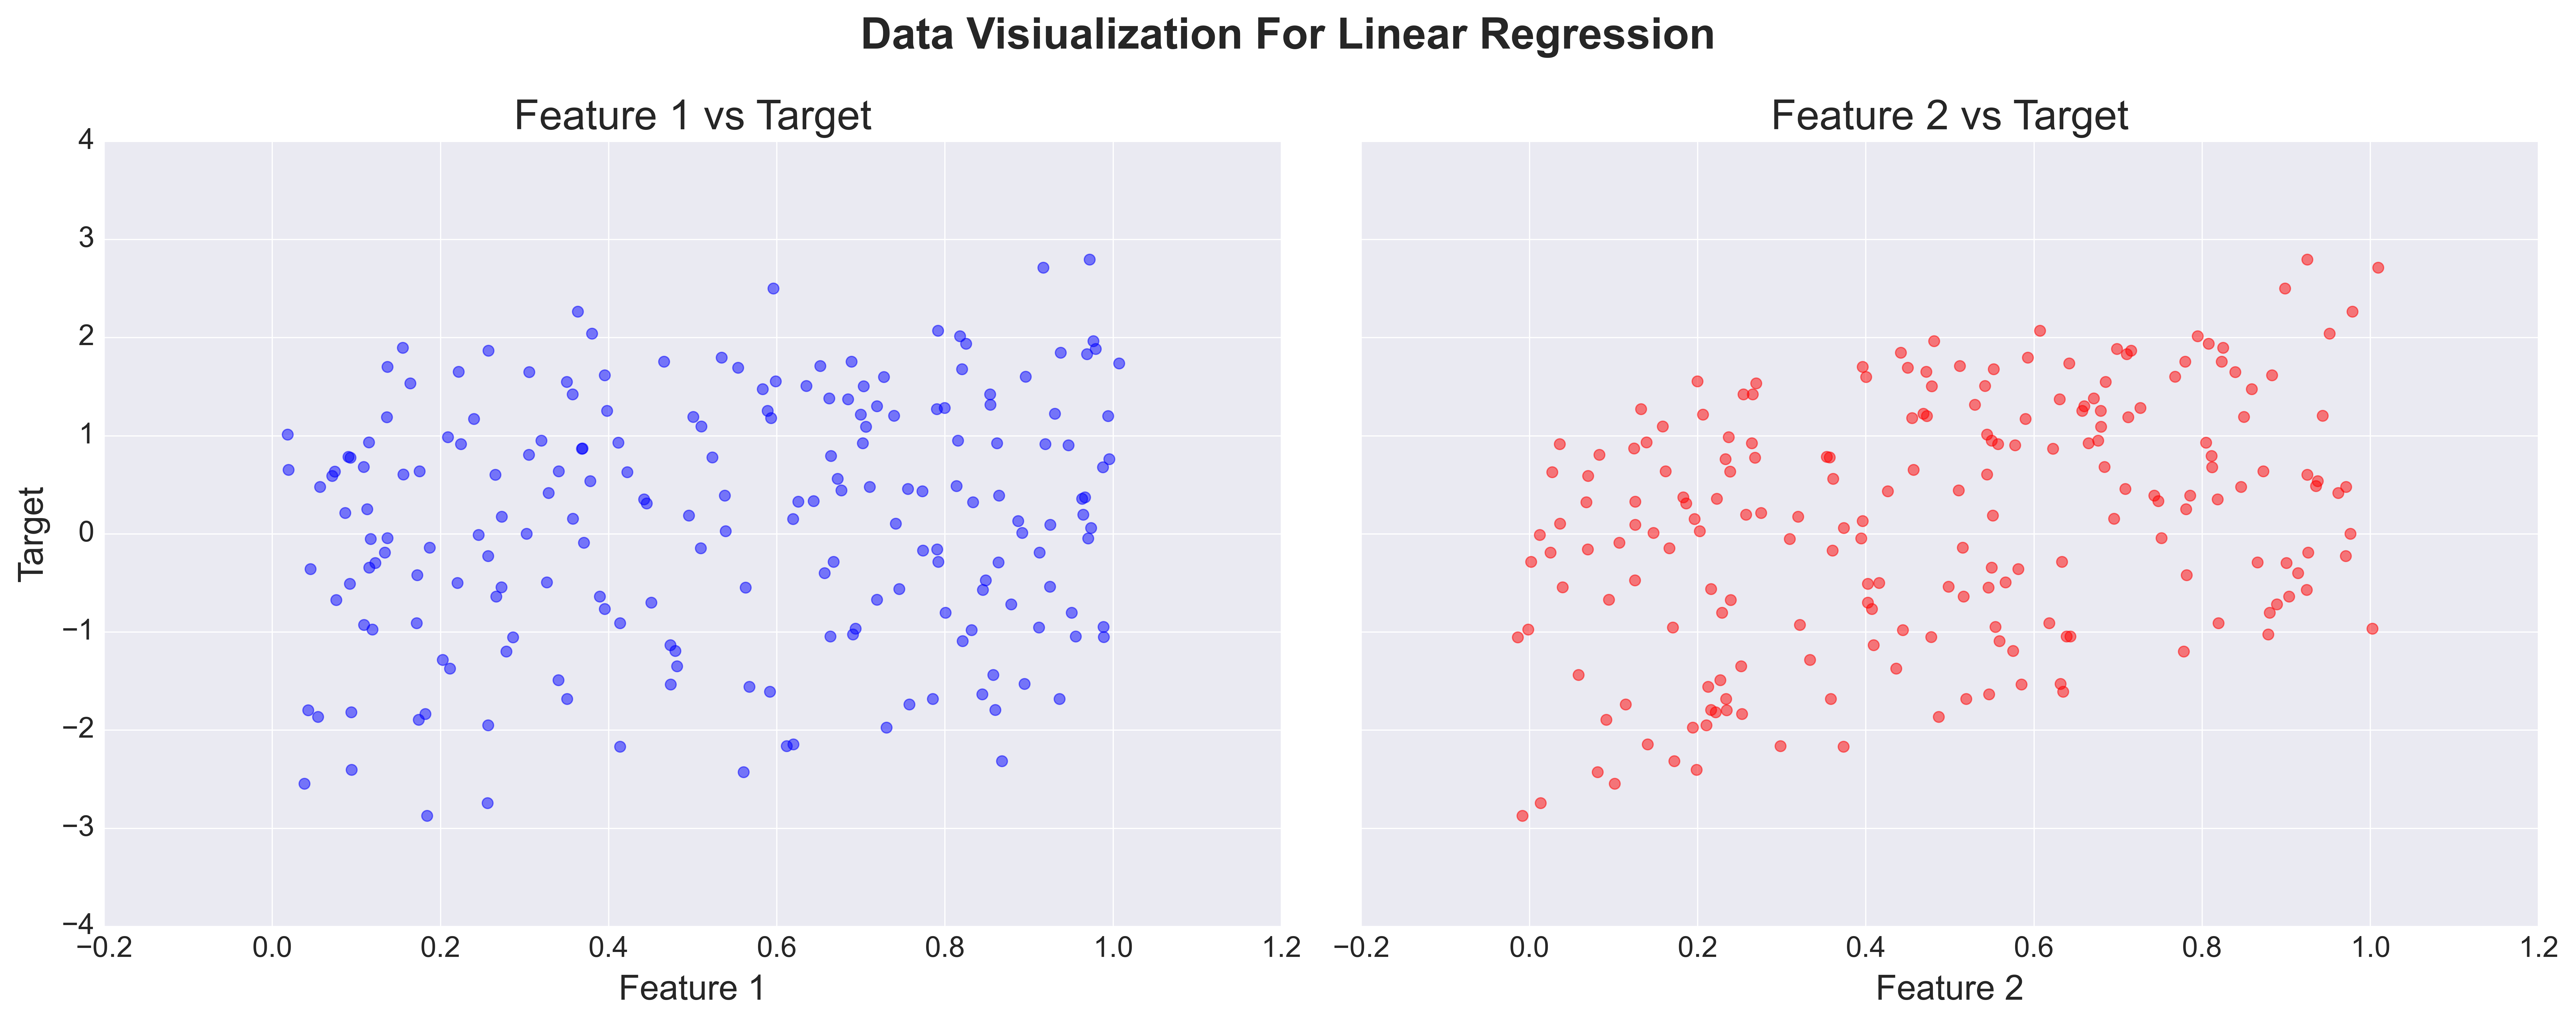

In [991]:
fig,ax = plt.subplots(ncols=2,sharex=True,sharey=True)
# Set Appearance
fig.set_size_inches(15,6)
fig.set_dpi(600)
fig.set_tight_layout(tight=True)
fig.suptitle("Data Visiualization For Linear Regression",fontsize=18,fontweight='bold')

ax[0].scatter(X_train[:, 0], y_train, alpha=0.5, color="blue")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Target")
ax[0].set_title("Feature 1 vs Target")

ax[1].scatter(X_train[:, 1], y_train, alpha=0.5, color="red")
ax[1].set_xlabel("Feature 2")
ax[1].set_title("Feature 2 vs Target")

plt.show()

In [992]:
# Declare HyperParameters
KFOLD= 10
LEARNING_RATE_RANGE = (0,1)
INCREMENT_VALUE = 0.1

In [993]:
lr = LEARNING_RATE_RANGE[0]+INCREMENT_VALUE
results ={}
while lr<= LEARNING_RATE_RANGE[1]:
    model = sk.linear_model.SGDRegressor(
        eta0 = lr, learning_rate="constant", max_iter=1000, loss="squared_error"
    )
    scores = -cross_val_score(model, X_train, y_train, cv=KFOLD, scoring="neg_mean_squared_error")
    results.update({lr:scores.mean()})
    del model
    lr+=INCREMENT_VALUE

In [994]:
# Display results
print("Hyperparameter Tuning Results (MSE):")
for lr, mse in results.items():
    print(f"Alpha: {lr:.2f}, MSE: {mse:.4f}")

Hyperparameter Tuning Results (MSE):
Alpha: 0.10, MSE: 1.3855
Alpha: 0.20, MSE: 1.5206
Alpha: 0.30, MSE: 1.7924
Alpha: 0.40, MSE: 1.9186
Alpha: 0.50, MSE: 3.2092
Alpha: 0.60, MSE: 2.5008
Alpha: 0.70, MSE: 3.7477
Alpha: 0.80, MSE: 7.2926
Alpha: 0.90, MSE: 7.4373
Alpha: 1.00, MSE: 11.0734


The best learning rate found by 10-fold cross validation and its cross validation mean squared error

In [995]:
best_learning_rate = min(results)
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Cross validation mean squared error :{results[best_learning_rate]:.5f}")

Best Learning Rate: 0.1
Cross validation mean squared error :1.38554


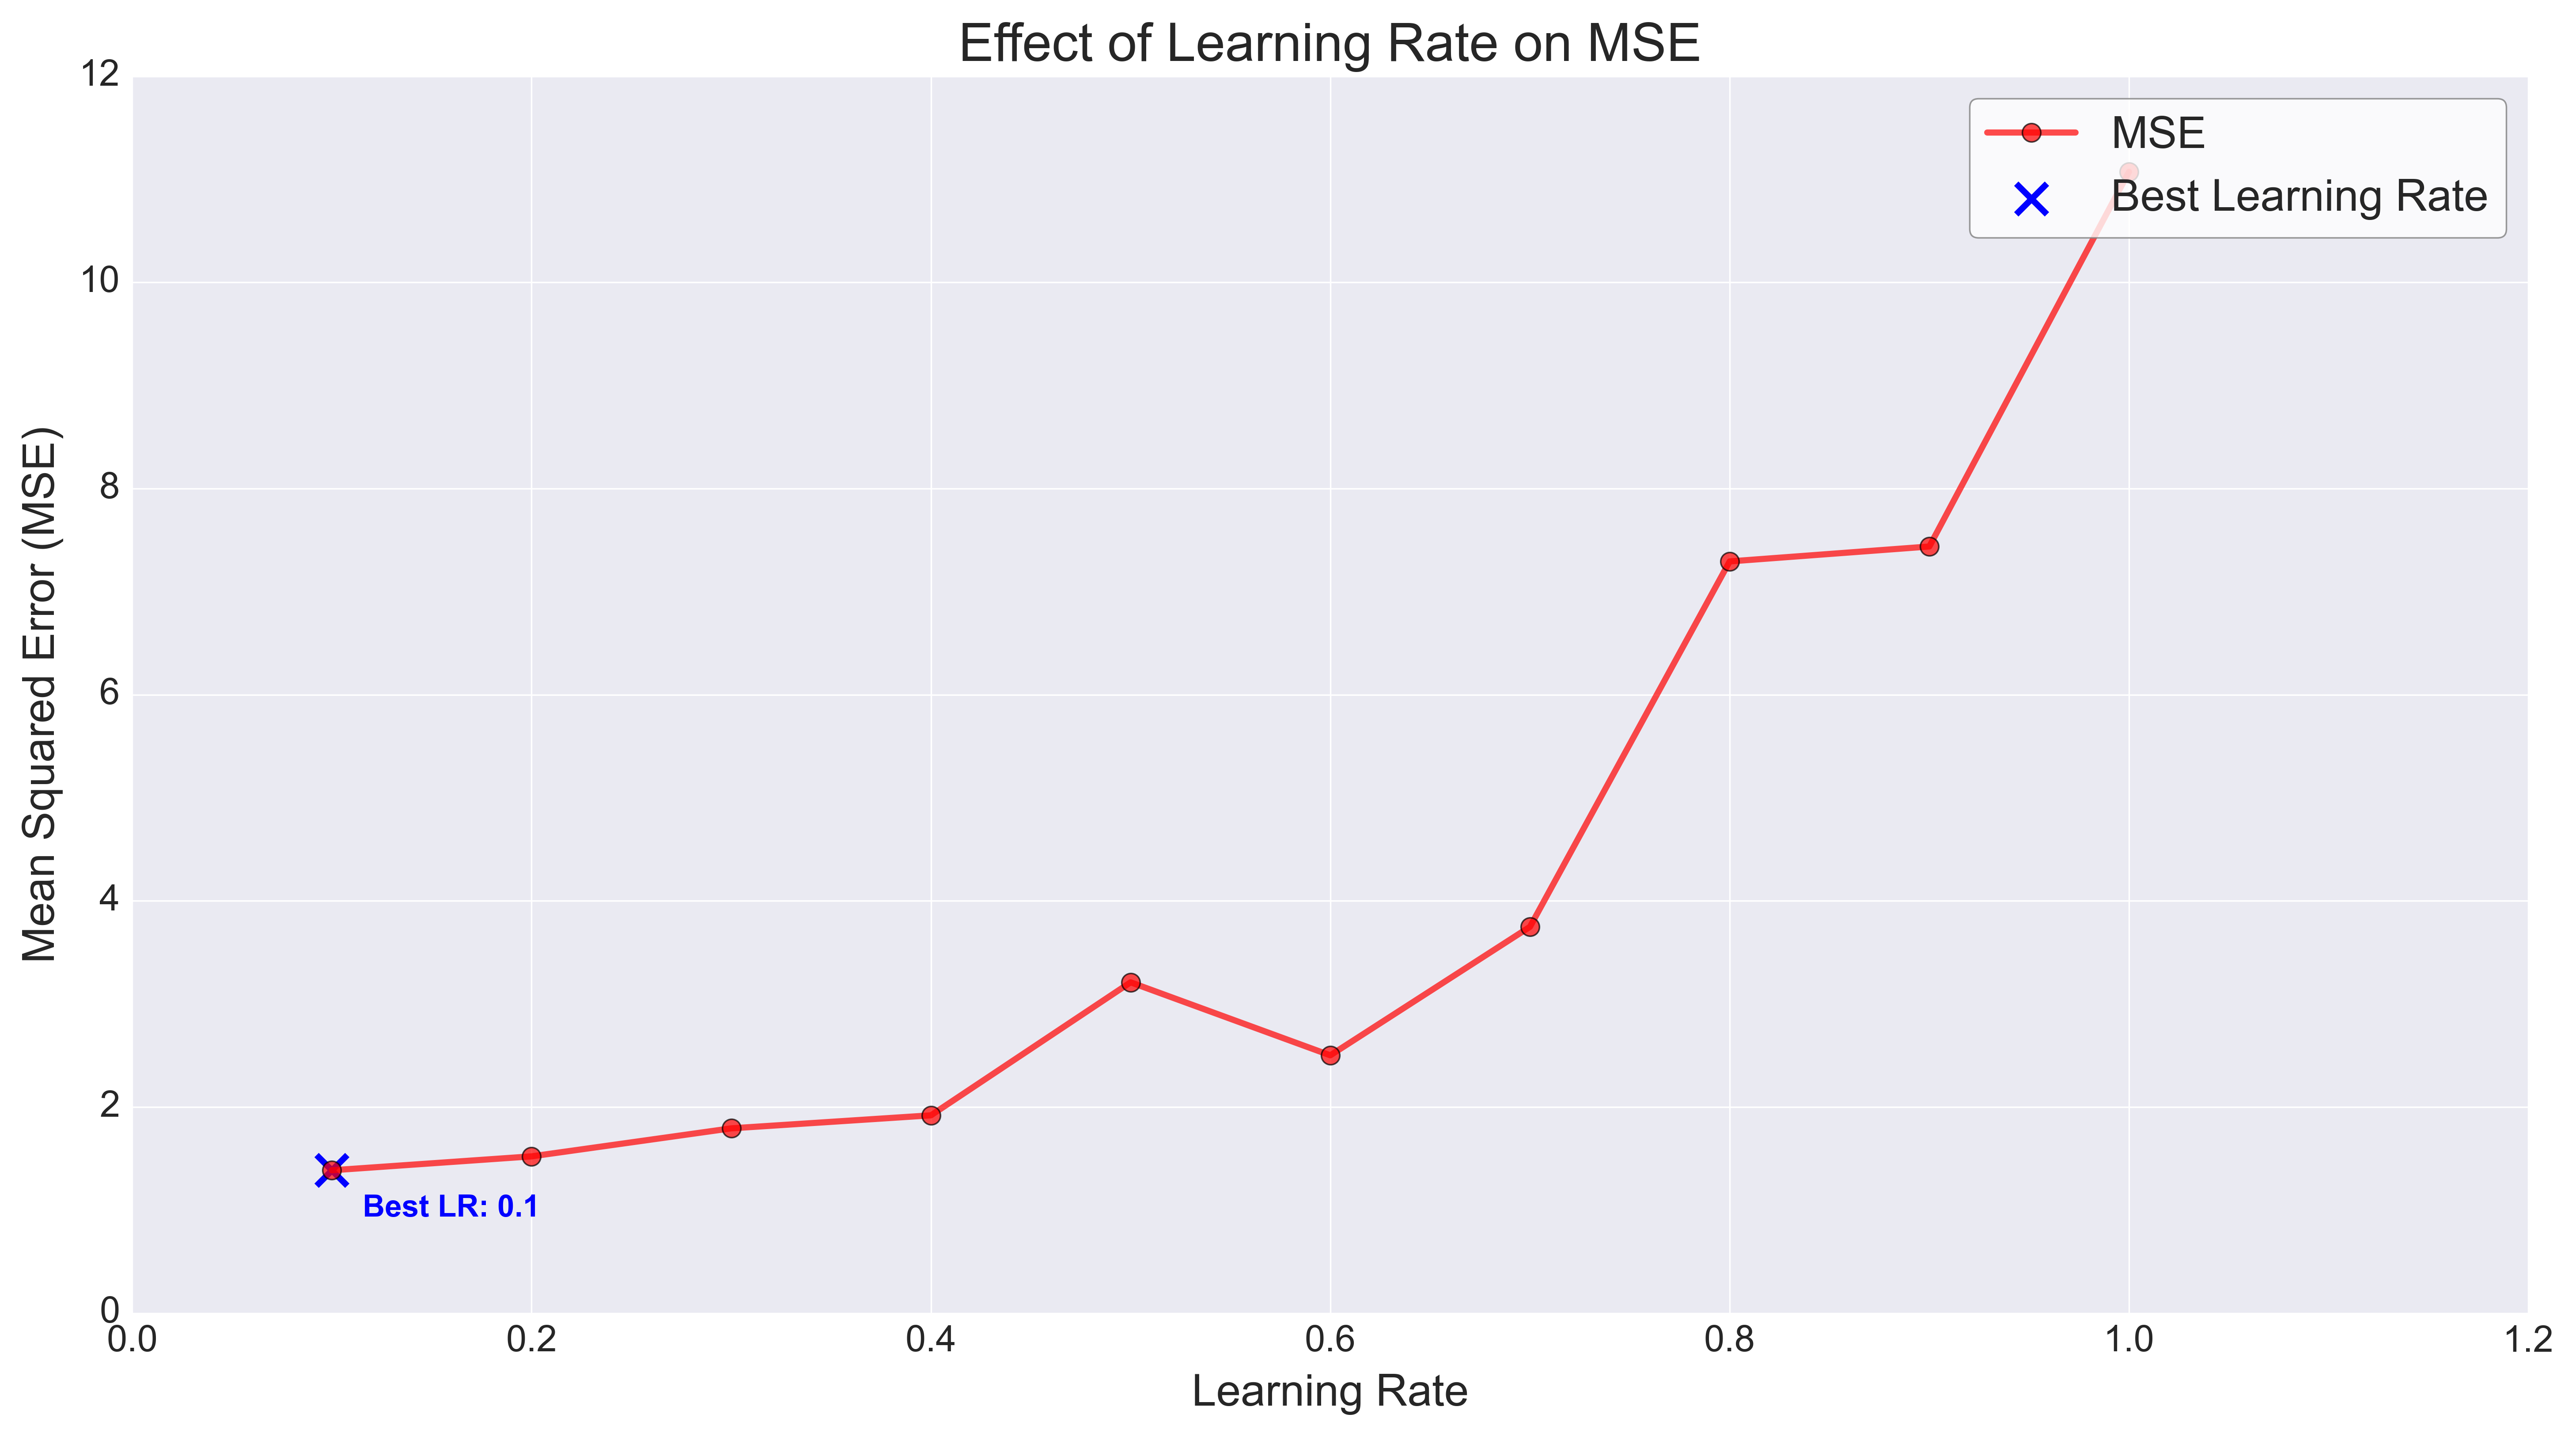

In [996]:
# Display results
plt.figure(figsize=(14, 7),dpi=500)

plt.plot(results.keys(),results.values(),marker="o",linestyle="-",color="r",label="MSE",linewidth=2,alpha=0.7)
plt.scatter(best_learning_rate,results[best_learning_rate],marker="x",color="b",label="Best Learning Rate",s=100)

plt.annotate(f"Best LR: {best_learning_rate:.1f}",(best_learning_rate, results[best_learning_rate]),textcoords="offset points",
    xytext=(10, -15),
    ha="left",
    fontsize=10,
    color="blue",
    fontweight="bold",
)

plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of Learning Rate on MSE")
plt.legend(frameon=True,fancybox=True,framealpha=0.8,edgecolor="gray",facecolor="white")
plt.grid(True)
plt.show()

The test mean squared error based on the best learning rate.

In [997]:
model_test = sk.linear_model.SGDRegressor(eta0=best_learning_rate, learning_rate="constant", max_iter=1000, loss="squared_error")

In [998]:
model_test.fit(X_train,y_train)
y_pred = model_test.predict(X_test)

In [999]:
mse_on_test_data = sk.metrics.mean_squared_error(y_test,y_pred)
print(f"mean squared error based on the best learning rate on test data: {mse_on_test_data:.5f}")

mean squared error based on the best learning rate on test data: 1.41329
